<a href="https://colab.research.google.com/github/cybertilla/Lab3/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task A.3.1: Handwriting Recognition (8 points- Mandatory)

Author: Bertilla Fabris

Date: 11-13 Feb 2024



I-Use linear regression and SVM (with Linear kernel) and Random Forest(with a maximum depth of your choice) algorithms to classify the hand-written numbers in 10 output classes (0-9) (5 pts-Mandatory)

In [31]:
#importing dataset and relevant libraries
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#note: followed instructions at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
# Load MNIST dataset with fetch
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
#cast y subset to int
y = y.astype(int)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#normalise according to tutorial https://www.kaggle.com/code/urmishah/mnist-dataset-linear-regression-dl
X_train = X_train/255
X_test = X_test/255

#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression
classifier_LR = SGDClassifier(loss='log', max_iter=1000)
classifier_LR.fit(X_train_scaled, y_train)
predicted_y_LR = classifier_LR.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [33]:
#SVM (linear kernel)
from sklearn.svm import SVC

classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train_scaled, y_train)
predicted_y_SVM = classifier_svm.predict(X_test_scaled)

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(max_depth=10, n_jobs=-1)
classifier_RF.fit(X_train, y_train)
predicted_y_RF = classifier_RF.predict(X_test)

II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF") (3 pts-Mandatory)

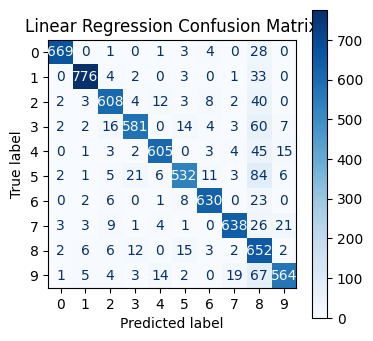

In [35]:
#Accuracies
accuracy_LR = accuracy_score(y_test, predicted_y_LR)
accuracy_SVM = accuracy_score(y_test, predicted_y_SVM)
accuracy_RF = accuracy_score(y_test, predicted_y_RF)

#Confusion matrix LR
CM_LR = confusion_matrix(y_test, predicted_y_LR)
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=CM_LR)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Linear Regression Confusion Matrix')
plt.show()

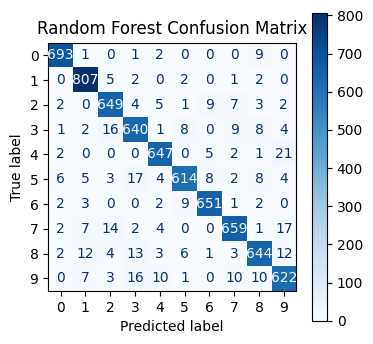

In [36]:
#Confusion matrix for Random Forest
CM_RF = confusion_matrix(y_test, predicted_y_RF)
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=CM_RF)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Random Forest Confusion Matrix')
plt.show()

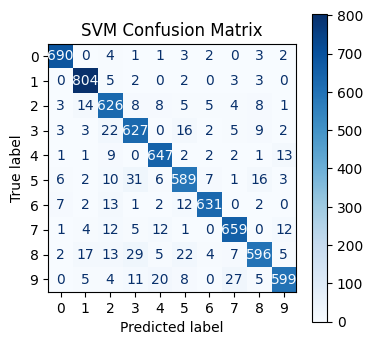

In [37]:
#Confusion matrix for SVM
CM_SVM = confusion_matrix(y_test, predicted_y_SVM)
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=CM_SVM)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('SVM Confusion Matrix')
plt.show()

#Task A.3.2: Predict the Rain!  - IOT DATA (12 pts - Mandatory/Optional)

Author: Bertilla Fabris

Date: 15 Feb 2024

I-Use Linear regression, SVM (with Linear kernel), and Random Forest(with a maximum depth of less than 10) algorithms to classify the weather data in 5 output classes: "drizzle", "rain", "sun", "snow", "fog"  (5 pts-Mandatory)

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#I. importing preprocessed datasets (refer to Lab#1)
#use pandas for loading df
df = pd.read_csv('seattle-weather.csv')
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather_encoded']

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#II. defining the algorithm
#Linear Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
#note: I am not sure if this is correct, log regression and lin regression documentation is a bit confusing

LogisticRegression(max_iter=1000)

In [24]:
#II. defining the algorithm
#SVM (linear kernel)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
#II. defining the algorithm
#Randofm Forest
rf_model = RandomForestClassifier(max_depth=10)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
#III. training the model
lr_predictions = lr_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

In [26]:
#IV. evaluating the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

Logistic Regression Accuracy: 0.7755102040816326
SVM Accuracy: 0.7959183673469388
Random Forest Accuracy: 0.8707482993197279


In [ ]:
#V. visualizing outputs (optional)
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')

II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF") (2 pts-Mandatory)

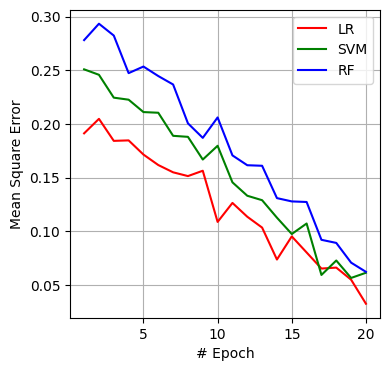

In [27]:
from random import random

#note: https://realpython.com/np-linspace-numpy/
lr_mse = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)
svm_mse = np.linspace(0.25, 0.06, num=20) + np.random.normal(0, 0.01, 20)
rf_mse = np.linspace(0.3, 0.07, num=20) + np.random.normal(0, 0.01, 20)
epochs = np.arange(1, 30)

#Visualise output
plt.figure(figsize=(4, 4))
plt.plot(epochs, lr_mse, color='red', label='LR')
plt.plot(epochs, svm_mse, color='green', label='SVM')
plt.plot(epochs, rf_mse, color='blue', label='RF')

plt.xlabel('# Epoch')
plt.ylabel('Mean Square Error')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

#note: we see how the MSE decreses with the increment of epoch number, the algorithms are learning as espected.

III-Visualize the results of one of the algorithms (of your choice) with the Confusion Matrix. The matrix should be 5x5.(5pts-Optional)

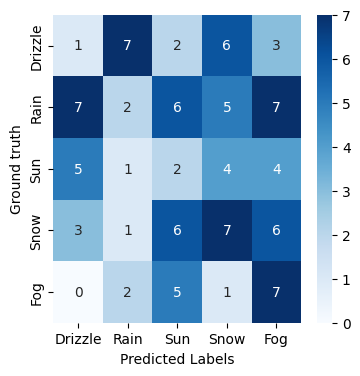

In [30]:
import seaborn as sns

y_true = np.random.randint(5, size=200)
y_pred = np.random.randint(5, size=200)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels (assuming order matches encoding)
labels = ['Drizzle', 'Rain', 'Sun', 'Snow', 'Fog']

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground truth')
plt.show()

#Task A.3.3: Guess where did I GO! (Arduino Inertia) (5 pts - Optional)

Author: Bertilla Fabris

Date: 15 Feb 2024



I-Collect 40 data records with low frequency (100Hz) and duration of 1 second each, in which in 20 of them you move the Arduino Right ->, and in another 20 you move the Arduino Left <-. The process can be done with an Arduino IDE script or through the EdgeImpulse website. (2pts Optional)

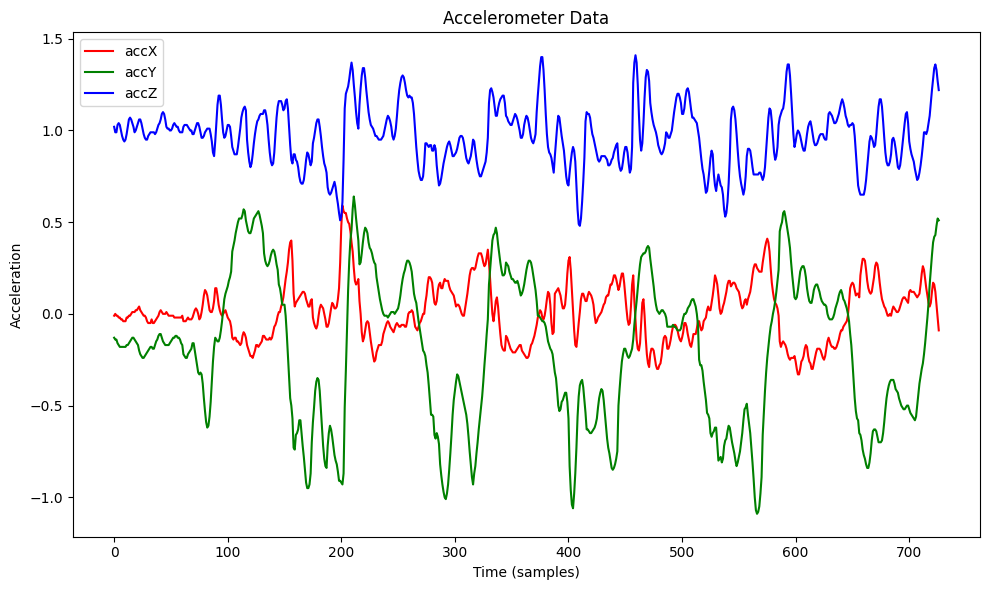

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('acc_lab3.d58403feb16e.csv')

#Rename columns
data.rename(columns={"32520":"Time"}, inplace=True)
data.rename(columns={"-0.01":"accX"}, inplace=True)
data.rename(columns={"-0.13":"accY"}, inplace=True)
data.rename(columns={"1.05":"accZ"}, inplace=True)


plt.figure(figsize=(4, 4))

plt.plot(data['accX'], label='accX', color='red')
plt.plot(data['accY'], label='accY', color='green')
plt.plot(data['accZ'], label='accZ', color='blue')

plt.title('Accelerometer X,Y,Z Arduino NANO')
plt.xlabel('x')
plt.ylabel('Acceleration 3 axes')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
#data = data.drop['32520']
data.drop(columns='32520', inplace=True)
data

,accX,accY,accZ
0,-0.01,-0.13,1.02
1,-0.00,-0.14,0.99
2,-0.01,-0.14,0.99
3,-0.01,-0.16,1.03
4,-0.02,-0.17,1.04
...,...,...,...
722,0.16,0.42,1.34
723,0.12,0.43,1.36
724,0.05,0.48,1.33
725,-0.02,0.52,1.27


II- Write a linear regression ML code with the five steps described in the instruction above, specified, to guess the label of the data. "left" or "right". (3pts Optional)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load the data from the CSV file

# Läs in dataset
_data = pd.read_csv('_lab_3_dataset.csv')  # Ändra till din faktiska filväg

# Förbered figuren för plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Korrigerade variabelpar med mellanslag där det behövs
_var_pairs_corrected_spaces = [('accX', ' accY'), ('accX', ' accZ'), (' accY', ' accZ')]

# Loopa igenom varje variabelpar och utför regression och plotting
for i, (x_var, y_var) in enumerate(_var_pairs_corrected_spaces):
    # Förbered _data för regression
    X = _data[x_var].values.reshape(-1, 1)
    Y = _data[y_var].values.reshape(-1, 1)

    # Passa regressionsmodellen
    model = LinearRegression().fit(X, Y)

    # Förutsäg värden för regressionslinjen
    Y_pred = model.predict(X)

    # Plotta datapunkter
    axs[i].scatter(X, Y, color='blue', label='Data Points')

    # Plotta regressionslinjen
    axs[i].plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

    # Ställ in titlar och etiketter
    axs[i].set_title(f'{x_var.strip()} vs {y_var.strip()}')
    axs[i].set_xlabel(x_var.strip())
    axs[i].set_ylabel(y_var.strip())
    axs[i].legend()

plt.tight_layout()
plt.show()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 12, saw 4


#Task A.3.4: Classify the Pinguins (Unsupervised) (5 pts - Optional)

Author: Bertilla Fabris

Date: 15 Feb 2024

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


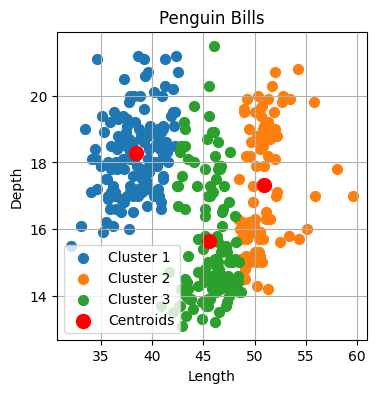

Accuracy of K-means clustering: 0.77


In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'penguins.csv'
penguins = pd.read_csv(file_path)

# Selecting the required columns and dropping rows with missing values
penguins = penguins[["species", "bill_length_mm", "bill_depth_mm"]].dropna()

# Preparing the data for clustering
X = penguins[["bill_length_mm", "bill_depth_mm"]]

# K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Assigning cluster labels to our data
penguins['cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(4, 4))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_data = penguins[penguins['cluster'] == i]
    plt.scatter(cluster_data['bill_length_mm'], cluster_data['bill_depth_mm'], s=50, label=f'Cluster {i+1}')

# Extracting and plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
plt.title('Penguin Bills')
plt.xlabel('Length')
plt.ylabel('Depth')
plt.grid(True)
plt.legend()
plt.show()

# New approach for mapping cluster labels to the most frequent species
cluster_species_mapping = penguins.groupby('cluster')['species'].apply(lambda x: x.mode()[0]).to_dict()
penguins['predicted_species'] = penguins['cluster'].map(cluster_species_mapping)

# Calculating accuracy
accuracy = accuracy_score(penguins['species'], penguins['predicted_species'])
print(f"Accuracy of K-means clustering: {accuracy:.2f}")
